In [2]:

import pandas as pd
import numpy as np
from pandas.core.frame import DataFrame

In [3]:
# Methods for plotting graphs
import seaborn as sns
import matplotlib.pyplot as plt

def plot_scatter(data: DataFrame, x_col, y_col):
    plt.scatter(data[x_col], data[y_col])
    plt.show()

def plot_histogram(data: DataFrame, column):
    sns.displot(data=data,x=column,kde=True)
    plt.show()

def create_heatmap_mask(corr_data: DataFrame):
    corr_mask = np.zeros_like(corr_data)
    corr_mask[np.triu_indices_from(corr_mask)] = True
    return corr_mask

### Import data and describe it

In [4]:

loans_df = pd.read_csv('Data/loan_data.csv')

print(f'The loan data has the following characteristics: \n{loans_df.describe()}')
loans_df.head()

The loan data has the following characteristics: 
       credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


#### **Purpose** column is categorical ans has to be one hot encoded. 

In [5]:
# Unique values in Purpose column
for col in loans_df.columns:
    set_unique_values = set(loans_df[col])
    if len(set_unique_values) < 50:
        print(f'The {col} column contains {len(set_unique_values)} unique values: \n{set_unique_values}')
        print('***********************************************************************************************************************************')

def one_hot_encoder(data: DataFrame, col: str):
    value: int = 0
    unique_values = set(data[col])
    for unique_value in unique_values:
        data[col] = data[col].replace(unique_value, value)
        print(f'{unique_value} is replced with {value}.')
        value += 1
    return data


loans_df = one_hot_encoder(loans_df, 'purpose')

The credit.policy column contains 2 unique values: 
{0, 1}
***********************************************************************************************************************************
The purpose column contains 7 unique values: 
{'all_other', 'educational', 'home_improvement', 'debt_consolidation', 'small_business', 'major_purchase', 'credit_card'}
***********************************************************************************************************************************
The fico column contains 44 unique values: 
{642, 772, 647, 777, 652, 782, 657, 787, 662, 792, 667, 797, 672, 802, 677, 807, 682, 812, 687, 817, 692, 822, 697, 827, 702, 707, 712, 717, 722, 727, 732, 737, 612, 742, 617, 747, 622, 752, 627, 757, 632, 762, 637, 767}
***********************************************************************************************************************************
The inq.last.6mths column contains 28 unique values: 
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,

#### Check for bad data

In [6]:
# Null or NaN values present? 
print(f'Presence of null values in Loans data: \n{loans_df.isnull().sum()}')
print('***********************************************************************************************************************************')
print(f'Presence of NaN values in Loans data: \n{loans_df.isnull().sum()}')
print('***********************************************************************************************************************************')
print(f'Presence of negatives values in Loans data: \n{loans_df[loans_df < 0].sum()}')


Presence of null values in Loans data: 
credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64
***********************************************************************************************************************************
Presence of NaN values in Loans data: 
credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64
***********************************************************************************************************************

### Outlier Analysis using IQR since all the data is now numerical

In [7]:
# Check for outliers
# Outlier analysis by skewness. skewness should lie between -1, 1
skewness_loans = loans_df.skew()
print(f'The skewness of each column of bags data is given by:\n{skewness_loans}.')
skewed_columns = skewness_loans[(skewness_loans < -1) | (skewness_loans > 1)].index.values
print(f'The following columns exhibit skewness beyond acceptable limits hinting at presence of outliers. \n{skewed_columns}')
#

The skewness of each column of bags data is given by:
credit.policy        -1.539621
purpose               0.088293
int.rate              0.164420
installment           0.912522
log.annual.inc        0.028668
dti                   0.023941
fico                  0.471260
days.with.cr.line     1.155748
revol.bal            11.161058
revol.util            0.059985
inq.last.6mths        3.584151
delinq.2yrs           6.061793
pub.rec               5.126434
not.fully.paid        1.854592
dtype: float64.
The following columns exhibit skewness beyond acceptable limits hinting at presence of outliers. 
['credit.policy' 'days.with.cr.line' 'revol.bal' 'inq.last.6mths'
 'delinq.2yrs' 'pub.rec' 'not.fully.paid']


#### Based on the skewness of each column we may conclulde that *credit.policy* is left skewed and *days.cr.line*, *revol.bal*, *inq.last.6mnth*, *delinq.2yrs*, *pub.rec*, *not.fully.paid* are right skewed which indicates the presence of outliers. 
- In case of the target column, *not.fully.paid* , the skewness could indicate a class imbalance requiring further analysis.
- We can remove outright or replace outliers with mean/median values based on their frequency, and the mean and median values of the columns.


*****************************************credit.policy*****************************************
Max: 1
Mean: 0.8049697222802256
Min:0
Median: 1.0
The column contains 1868 outliers, they are: 
7710    0
7711    0
7712    0
7713    0
7714    0
       ..
9573    0
9574    0
9575    0
9576    0
9577    0
Name: credit.policy, Length: 1868, dtype: int64


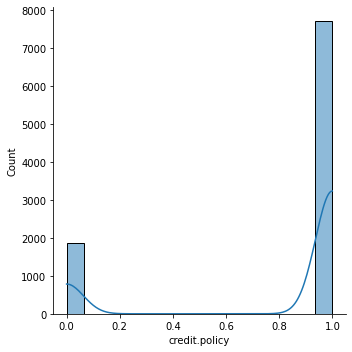

**************************************************************************************************
*****************************************days.with.cr.line*****************************************
Max: 17639.95833
Mean: 4560.767196529213
Min:178.9583333
Median: 4139.958333
The column contains 346 outliers, they are: 
21      11951.00000
55      14008.95833
92      13349.95833
96      10292.00000
113     16213.00000
           ...     
9421    11040.04167
9458    12930.04167
9491    11220.00000
9540    10236.00000
9573    10474.00000
Name: days.with.cr.line, Length: 346, dtype: float64


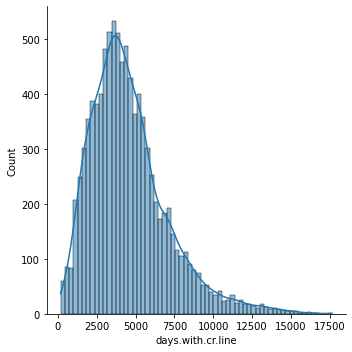

**************************************************************************************************
*****************************************revol.bal*****************************************
Max: 1207359
Mean: 16913.963875548132
Min:0
Median: 8596.0
The column contains 780 outliers, they are: 
5        50807
8        69909
29       85607
34       66033
39       60568
         ...  
9553    197716
9554     56909
9557    338935
9564    385489
9573    215372
Name: revol.bal, Length: 780, dtype: int64


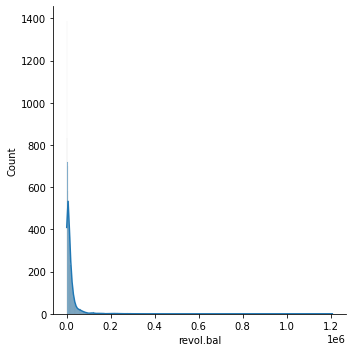

**************************************************************************************************
*****************************************inq.last.6mths*****************************************
Max: 33
Mean: 1.5774692002505741
Min:0
Median: 1.0
The column contains 478 outliers, they are: 
360     6
403     6
432     6
462     8
517     8
       ..
9566    9
9568    6
9572    6
9575    8
9577    6
Name: inq.last.6mths, Length: 478, dtype: int64


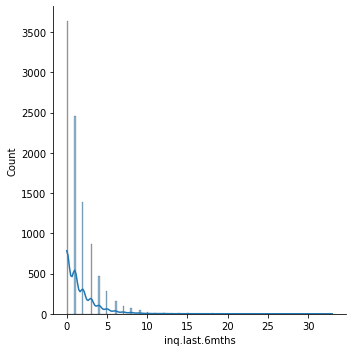

**************************************************************************************************
*****************************************delinq.2yrs*****************************************
Max: 13
Mean: 0.1637084986427229
Min:0
Median: 0.0
The column contains 1120 outliers, they are: 
4       1
11      1
13      1
25      2
27      1
       ..
9531    3
9536    2
9538    1
9540    3
9552    2
Name: delinq.2yrs, Length: 1120, dtype: int64


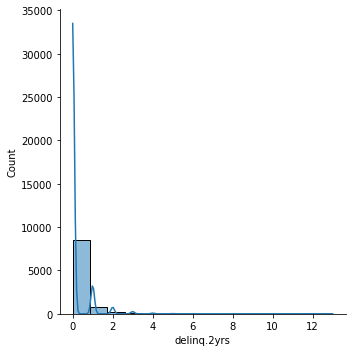

**************************************************************************************************
*****************************************pub.rec*****************************************
Max: 5
Mean: 0.06212152850281896
Min:0
Median: 0.0
The column contains 559 outliers, they are: 
6       1
10      1
24      1
37      1
63      1
       ..
9532    1
9537    1
9549    1
9568    1
9571    1
Name: pub.rec, Length: 559, dtype: int64


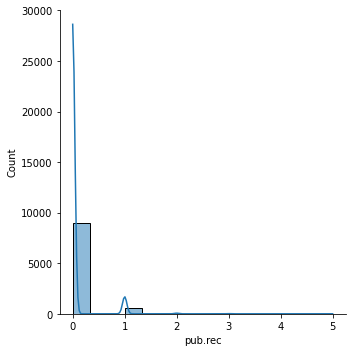

**************************************************************************************************


In [11]:
# Clean up outliers
# Histogram plot of the skewed columns

def get_outliers(data:DataFrame):
    q3 = data.quantile(.75)
    q1 = data.quantile(.25)
    iqr = q3 - q1
    return data[((data < (q1 - 1.5 * iqr)) | (data > (q3 + 1.5 * iqr)))]

skewed_columns = skewed_columns[skewed_columns != 'not.fully.paid']
for col in skewed_columns:
    print(f'*****************************************{col}*****************************************')
    print(f'Max: {loans_df[col].max()}\nMean: {loans_df[col].mean()}\nMin:{loans_df[col].min()}\nMedian: {loans_df[col].median()}')
    outliers = get_outliers(loans_df[col])
    print(f'The column contains {len(outliers)} outliers, they are: \n{outliers}')
    plot_histogram(loans_df, column=col)
    print('**************************************************************************************************')